## Deep Learning Algoritmaları ile Fotoğraflardaki Nesneleri Tanıma ve Sınıflandırma

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset'i yükleme işlemi

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

###### Her bir fotoğraf 32 pixele - 32 pixel kare boyutunda ve renkli 3 kanal RGB.

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

y_train ve y_test 2 boyutlu bir array olarak tutluyor cifar10 datasetinde. Verileri görsel olarak daha rahat anlamak için tek boyutlu hale getiririz. 

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

#### Verile Göz Atma

In [8]:
image_class = ["airplane","automobile","bird","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(image_class[y[index]])
    plt.show()

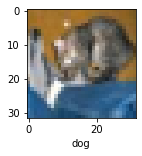

In [13]:
plot_sample(X_test, y_test, 0)

IndexError: list index out of range

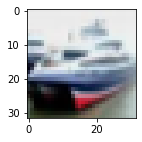

In [14]:
plot_sample(X_test, y_test, 1)

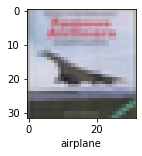

In [15]:
plot_sample(X_test, y_test, 3)

### Normalization

CNN algoritmasının doğru çalışması için normalize edilmesi gerekir. Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalization için her bir pixel değerini 255'e bölmek yeterli

In [16]:
X_train = X_train/255
X_test = X_test/255

## CNN Algoritmasının Tasarımı

In [17]:
deep_learning_model = models.Sequential([
    # ilk bölüm Convulation Layer. Bu kısımda fotoğrafların tanımlama yapabilmek için özellikleri çıkarıyoruz
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # İkinci Bölüm: klasik Artificial Neural Network olan layer. 
    # Yukarıdaki özelleliklerimiz ve training bilgilerine göre ANN modeli eğitme.
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 tane sınıf olduğu için 
])

2022-04-22 01:30:17.341390: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-22 01:30:17.341900: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [18]:
deep_learning_model.compile(optimizer='adam',
                           loss = 'sparse_categorical_crossentropy',
                           metrics = ['accuracy'])

## Modeli Eğitmek

In [19]:
deep_learning_model.fit(X_train,y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.4487 - accuracy: 0.4794
Epoch 2/5
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.1114 - accuracy: 0.6112
Epoch 3/5
50000/50000 [==============================] - 110s 2ms/sample - loss: 0.9828 - accuracy: 0.6563
Epoch 4/5
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.8995 - accuracy: 0.6867
Epoch 5/5
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.8288 - accuracy: 0.7122


In [20]:
deep_learning_model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9347359733581543, 0.6766]

In [21]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[1.8045974e-03, 3.4335745e-04, 1.0114430e-02, 6.9513977e-01,
        4.0452345e-03, 1.3880630e-01, 6.4966954e-02, 8.4770116e-05,
        7.7490427e-02, 7.2042360e-03],
       [2.2982782e-02, 1.7422479e-01, 4.2606686e-04, 2.0364443e-05,
        6.6942839e-06, 2.5847889e-06, 4.3395303e-06, 1.4986522e-05,
        7.9305637e-01, 9.2610577e-03],
       [1.2528201e-02, 2.4362419e-02, 1.1519751e-03, 2.2870186e-03,
        1.3988102e-03, 2.0003956e-04, 2.4512262e-04, 3.6542880e-04,
        9.5163953e-01, 5.8214921e-03]], dtype=float32)

In [22]:
y_predictions_class = [np.argmax(element) for element in y_pred]
y_predictions_class[:3]

[3, 8, 8]

In [23]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

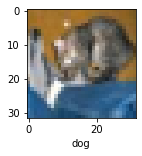

In [24]:
plot_sample(X_test, y_test, 0)

In [25]:
image_class[y_predictions_class[0]]

'dog'

IndexError: list index out of range

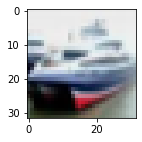

In [26]:
plot_sample(X_test,y_test,1)

In [27]:
image_class[y_predictions_class[1]]

IndexError: list index out of range

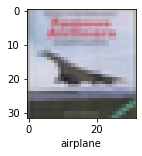

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
image_class[y_predictions_class[3]]

'airplane'

IndexError: list index out of range

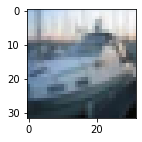

In [30]:
plot_sample(X_test, y_test,2)

In [31]:
image_class[y_predictions_class[2]]

IndexError: list index out of range